In [63]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib as plt
#import tensorflow as tf

In [64]:
# matplotlib
%matplotlib inline
import matplotlib
#matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams["figure.dpi"] = 125

#set the font for matplotlib
from matplotlib import style
style.use('fivethirtyeight')

from matplotlib import figure
# Pandas and Numpy
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [65]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the table
us_data = Base.classes.us_data_df_v3


In [66]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [67]:
#create df from Recession_Indicator table
results = []

results = session.query(us_data.intdate, \
                        us_data.ri, \
                        us_data.cpi, \
                        us_data.gdp, \
                        us_data.inf, \
                        us_data.unp, \
                        us_data.dji_open, \
                        us_data.dji_open_lag1, \
                        us_data.dji_open_lag7, \
                        us_data.dji_open_lag14, \
                        us_data.dji_open_lag30, \
                        us_data.dji_open_lag90, \
                        us_data.dji_open_lag365, \
                        us_data.dji_close, \
                        us_data.dji_close_lag1, \
                        us_data.dji_close_lag7, \
                        us_data.dji_close_lag14, \
                        us_data.dji_close_lag30, \
                        us_data.dji_close_lag90, \
                        us_data.dji_close_lag365, \
                        us_data.dji_opcl_diff, \
                        us_data.dji_opcl_diff_lag1, \
                        us_data.dji_opcl_diff_lag7, \
                        us_data.dji_opcl_diff_lag14, \
                        us_data.dji_opcl_diff_lag30, \
                        us_data.dji_opcl_diff_lag90, \
                        us_data.dji_opcl_diff_lag365, \
                        us_data.dji_high, \
                        us_data.dji_high_lag1, \
                        us_data.dji_high_lag7, \
                        us_data.dji_high_lag14, \
                        us_data.dji_high_lag30, \
                        us_data.dji_high_lag90, \
                        us_data.dji_high_lag365, \
                        us_data.dji_low, \
                        us_data.dji_low_lag1, \
                        us_data.dji_low_lag7, \
                        us_data.dji_low_lag14, \
                        us_data.dji_low_lag30, \
                        us_data.dji_low_lag90, \
                        us_data.dji_low_lag365, \
                        us_data.dji_hilo_diff, \
                        us_data.dji_hilo_diff_lag1, \
                        us_data.dji_hilo_diff_lag7, \
                        us_data.dji_hilo_diff_lag14, \
                        us_data.dji_hilo_diff_lag30, \
                        us_data.dji_hilo_diff_lag90, \
                        us_data.dji_hilo_diff_lag365
                       )


data_df = pd.DataFrame(results)
data_df.head()

,intdate,ri,cpi,gdp,inf,unp,dji_open,dji_open_lag1,dji_open_lag7,dji_open_lag14,...,dji_low_lag30,dji_low_lag90,dji_low_lag365,dji_hilo_diff,dji_hilo_diff_lag1,dji_hilo_diff_lag7,dji_hilo_diff_lag14,dji_hilo_diff_lag30,dji_hilo_diff_lag90,dji_hilo_diff_lag365
0,19701231,False,16.792044,NaN,5.838255,NaN,838.92000000,None,None,None,...,None,None,None,0E-8,None,None,None,None,None,None
1,19710104,False,16.834236,1135.156,4.292767,5.994841,830.57000000,8.35000000,None,None,...,None,None,None,0E-8,0E-8,None,None,None,None,None
2,19710105,False,16.834236,1135.156,4.292767,5.997475,835.77000000,-5.20000000,None,None,...,None,None,None,0E-8,0E-8,None,None,None,None,None
3,19710106,False,16.834236,1135.156,4.292767,6.007436,837.97000000,-2.20000000,None,None,...,None,None,None,0E-8,0E-8,None,None,None,None,None
4,19710107,False,16.834236,1135.156,4.292767,6.121167,837.83000000,0.14000000,None,None,...,None,None,None,0E-8,0E-8,None,None,None,None,None


In [68]:
# CSV Import our input dataset
#data_df = pd.read_csv('us_data_df_v2.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
#data_df = data_df.dropna()
#data_df.head()

In [69]:
# convert to float
data_df[['dji_open', \
            'dji_open_lag1', \
            'dji_open_lag7', \
            'dji_open_lag14', \
            'dji_open_lag30', \
            'dji_open_lag90', \
            'dji_open_lag365', \
            'dji_close', \
            'dji_close_lag1', \
            'dji_close_lag7', \
            'dji_close_lag14', \
            'dji_close_lag30', \
            'dji_close_lag90', \
            'dji_close_lag365', \
            'dji_opcl_diff', \
            'dji_opcl_diff_lag1', \
            'dji_opcl_diff_lag7', \
            'dji_opcl_diff_lag14', \
            'dji_opcl_diff_lag30', \
            'dji_opcl_diff_lag90', \
            'dji_opcl_diff_lag365', \
            'dji_high', \
            'dji_high_lag1', \
            'dji_high_lag7', \
            'dji_high_lag14', \
            'dji_high_lag30', \
            'dji_high_lag90', \
            'dji_high_lag365', \
            'dji_low', \
            'dji_low_lag1', \
            'dji_low_lag7', \
            'dji_low_lag14', \
            'dji_low_lag30', \
            'dji_low_lag90', \
            'dji_low_lag365', \
            'dji_hilo_diff', \
            'dji_hilo_diff_lag1', \
            'dji_hilo_diff_lag7', \
            'dji_hilo_diff_lag14', \
            'dji_hilo_diff_lag30', \
            'dji_hilo_diff_lag90', \
            'dji_hilo_diff_lag365']] \
            = data_df[['dji_open', \
                        'dji_open_lag1', \
                        'dji_open_lag7', \
                        'dji_open_lag14', \
                        'dji_open_lag30', \
                        'dji_open_lag90', \
                        'dji_open_lag365', \
                        'dji_close', \
                        'dji_close_lag1', \
                        'dji_close_lag7', \
                        'dji_close_lag14', \
                        'dji_close_lag30', \
                        'dji_close_lag90', \
                        'dji_close_lag365', \
                        'dji_opcl_diff', \
                        'dji_opcl_diff_lag1', \
                        'dji_opcl_diff_lag7', \
                        'dji_opcl_diff_lag14', \
                        'dji_opcl_diff_lag30', \
                        'dji_opcl_diff_lag90', \
                        'dji_opcl_diff_lag365', \
                        'dji_high', \
                        'dji_high_lag1', \
                        'dji_high_lag7', \
                        'dji_high_lag14', \
                        'dji_high_lag30', \
                        'dji_high_lag90', \
                        'dji_high_lag365', \
                        'dji_low', \
                        'dji_low_lag1', \
                        'dji_low_lag7', \
                        'dji_low_lag14', \
                        'dji_low_lag30', \
                        'dji_low_lag90', \
                        'dji_low_lag365', \
                        'dji_hilo_diff', \
                        'dji_hilo_diff_lag1', \
                        'dji_hilo_diff_lag7', \
                        'dji_hilo_diff_lag14', \
                        'dji_hilo_diff_lag30', \
                        'dji_hilo_diff_lag90', \
                        'dji_hilo_diff_lag365']].astype(float)

data_df = pd.get_dummies(data_df, columns=["ri"])
data_df.head(20)

,intdate,cpi,gdp,inf,unp,dji_open,dji_open_lag1,dji_open_lag7,dji_open_lag14,dji_open_lag30,...,dji_low_lag365,dji_hilo_diff,dji_hilo_diff_lag1,dji_hilo_diff_lag7,dji_hilo_diff_lag14,dji_hilo_diff_lag30,dji_hilo_diff_lag90,dji_hilo_diff_lag365,ri_False,ri_True
0,19701231,16.792044,NaN,5.838255,NaN,838.92,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,19710104,16.834236,1135.156,4.292767,5.994841,830.57,8.35,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
2,19710105,16.834236,1135.156,4.292767,5.997475,835.77,-5.20,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
3,19710106,16.834236,1135.156,4.292767,6.007436,837.97,-2.20,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
4,19710107,16.834236,1135.156,4.292767,6.121167,837.83,0.14,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
5,19710108,16.834236,1135.156,4.292767,6.194005,837.01,0.82,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
6,19710111,16.834236,1135.156,4.292767,6.095182,837.21,-0.20,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0
7,19710112,16.834236,1135.156,4.292767,5.978583,844.19,-6.98,-5.27,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,0
8,19710113,16.834236,1135.156,4.292767,NaN,841.11,3.08,-10.54,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,0
9,19710114,16.834236,1135.156,4.292767,NaN,843.31,-2.20,-7.54,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,0


In [70]:
data_df = data_df.dropna()
#data_df = data_df.fillna(0)

In [71]:
data_df.head(20)

,intdate,cpi,gdp,inf,unp,dji_open,dji_open_lag1,dji_open_lag7,dji_open_lag14,dji_open_lag30,...,dji_low_lag365,dji_hilo_diff,dji_hilo_diff_lag1,dji_hilo_diff_lag7,dji_hilo_diff_lag14,dji_hilo_diff_lag30,dji_hilo_diff_lag90,dji_hilo_diff_lag365,ri_False,ri_True
505,19730102,18.015585,1377.490,6.177760,5.098482,1031.68,-11.66,-22.50,1.51,-33.26,...,-145.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
506,19730103,18.015585,1377.490,6.177760,5.016887,1043.80,-12.12,-38.98,-7.53,-40.11,...,-156.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
507,19730104,18.015585,1377.490,6.177760,5.120382,1039.81,3.99,-39.81,-6.62,-34.24,...,-150.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
508,19730105,18.015585,1377.490,6.177760,4.961318,1047.49,-7.68,-43.28,-17.01,-42.45,...,-166.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
509,19730108,18.015585,1377.490,6.177760,4.857442,1047.86,-0.37,-41.16,-22.80,-34.61,...,-175.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
510,19730109,18.015585,1377.490,6.177760,4.911468,1047.11,0.75,-39.43,-19.87,-26.57,...,-185.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
511,19730110,18.015585,1377.490,6.177760,4.671672,1046.06,1.05,-26.04,-32.81,-20.85,...,-187.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
512,19730111,18.015585,1377.490,6.177760,4.869220,1051.70,-5.64,-20.02,-42.52,-33.94,...,-186.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
513,19730112,18.015585,1377.490,6.177760,4.949730,1039.36,12.34,4.44,-34.54,-20.02,...,-189.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
757,19740102,19.745419,1491.209,11.054805,5.213312,855.32,-4.46,-27.21,-21.14,36.01,...,61.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [72]:
# drop ri_False and rename ri_True ri
data_df = data_df.drop({"ri_False"}, axis=1).rename(columns={'ri_True':'ri'})

data_df.dtypes

intdate                   int64
cpi                     float64
gdp                     float64
inf                     float64
unp                     float64
dji_open                float64
dji_open_lag1           float64
dji_open_lag7           float64
dji_open_lag14          float64
dji_open_lag30          float64
dji_open_lag90          float64
dji_open_lag365         float64
dji_close               float64
dji_close_lag1          float64
dji_close_lag7          float64
dji_close_lag14         float64
dji_close_lag30         float64
dji_close_lag90         float64
dji_close_lag365        float64
dji_opcl_diff           float64
dji_opcl_diff_lag1      float64
dji_opcl_diff_lag7      float64
dji_opcl_diff_lag14     float64
dji_opcl_diff_lag30     float64
dji_opcl_diff_lag90     float64
dji_opcl_diff_lag365    float64
dji_high                float64
dji_high_lag1           float64
dji_high_lag7           float64
dji_high_lag14          float64
dji_high_lag30          float64
dji_high

## Data Insights

In [73]:
# EDA on Data Table, showing 370 observations and 9 characteristics
data_df.shape

(355, 48)

In [74]:
# EDA to see label of each column
data_df.columns.values 

array(['intdate', 'cpi', 'gdp', 'inf', 'unp', 'dji_open', 'dji_open_lag1',
       'dji_open_lag7', 'dji_open_lag14', 'dji_open_lag30',
       'dji_open_lag90', 'dji_open_lag365', 'dji_close', 'dji_close_lag1',
       'dji_close_lag7', 'dji_close_lag14', 'dji_close_lag30',
       'dji_close_lag90', 'dji_close_lag365', 'dji_opcl_diff',
       'dji_opcl_diff_lag1', 'dji_opcl_diff_lag7', 'dji_opcl_diff_lag14',
       'dji_opcl_diff_lag30', 'dji_opcl_diff_lag90',
       'dji_opcl_diff_lag365', 'dji_high', 'dji_high_lag1',
       'dji_high_lag7', 'dji_high_lag14', 'dji_high_lag30',
       'dji_high_lag90', 'dji_high_lag365', 'dji_low', 'dji_low_lag1',
       'dji_low_lag7', 'dji_low_lag14', 'dji_low_lag30', 'dji_low_lag90',
       'dji_low_lag365', 'dji_hilo_diff', 'dji_hilo_diff_lag1',
       'dji_hilo_diff_lag7', 'dji_hilo_diff_lag14', 'dji_hilo_diff_lag30',
       'dji_hilo_diff_lag90', 'dji_hilo_diff_lag365', 'ri'], dtype=object)

In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 505 to 11865
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   intdate               355 non-null    int64  
 1   cpi                   355 non-null    float64
 2   gdp                   355 non-null    float64
 3   inf                   355 non-null    float64
 4   unp                   355 non-null    float64
 5   dji_open              355 non-null    float64
 6   dji_open_lag1         355 non-null    float64
 7   dji_open_lag7         355 non-null    float64
 8   dji_open_lag14        355 non-null    float64
 9   dji_open_lag30        355 non-null    float64
 10  dji_open_lag90        355 non-null    float64
 11  dji_open_lag365       355 non-null    float64
 12  dji_close             355 non-null    float64
 13  dji_close_lag1        355 non-null    float64
 14  dji_close_lag7        355 non-null    float64
 15  dji_close_lag14    

- Data has only object values
- No variable column has null or missing values

## Summary Statistics

In [76]:
# EDA on Historical Price Table, beginning with basic statistics
data_df.describe()

,intdate,cpi,gdp,inf,unp,dji_open,dji_open_lag1,dji_open_lag7,dji_open_lag14,dji_open_lag30,...,dji_low_lag90,dji_low_lag365,dji_hilo_diff,dji_hilo_diff_lag1,dji_hilo_diff_lag7,dji_hilo_diff_lag14,dji_hilo_diff_lag30,dji_hilo_diff_lag90,dji_hilo_diff_lag365,ri
count,3.550000e+02,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,1.995436e+07,63.136035,8835.516690,4.073798,6.339896,6967.755437,-0.587577,-23.355183,-91.115606,-190.881662,...,-306.694451,-732.136732,118.720986,-2.878507,-27.542704,-4.745887,-13.468000,-12.372169,-10.024113,0.456338
std,1.334979e+05,25.884631,5610.106517,2.975878,1.620658,6223.293594,83.744350,215.730679,242.181785,389.519182,...,851.153406,1610.586441,125.422630,58.528972,71.094683,62.527689,92.829116,86.040183,104.573867,0.498793
min,1.973010e+07,18.015585,1377.490000,-0.355546,3.750499,632.040000,-319.050000,-787.940000,-860.130000,-1795.270000,...,-3923.450000,-7385.290000,0.000000,-379.000000,-351.620000,-458.750000,-483.210000,-582.810000,-579.790000,0.000000
25%,1.984011e+07,43.077079,3908.054000,2.270095,5.116190,1191.135000,-19.435000,-90.945000,-166.700000,-210.060000,...,-550.560000,-1576.555000,21.995000,-12.750000,-42.475000,-17.930000,-27.000000,-28.150000,-29.575000,0.000000
50%,1.995011e+07,63.497555,7522.289000,3.156842,5.982123,3867.410000,-2.990000,-25.470000,-44.430000,-91.970000,...,-90.160000,-300.600000,72.300000,0.000000,-10.140000,-1.830000,-2.770000,-2.930000,-6.460000,0.000000
75%,2.007011e+07,85.832240,14208.569000,4.827003,7.424400,10974.420000,15.280000,18.470000,1.575000,-18.035000,...,37.255000,60.155000,173.775000,7.600000,0.000000,7.165000,3.130000,3.735000,5.990000,1.000000
max,2.018011e+07,104.978124,20163.159000,13.549202,11.006776,25638.390000,369.190000,1353.230000,1237.370000,1462.100000,...,2907.760000,4900.730000,845.430000,293.610000,441.620000,291.200000,612.730000,470.260000,594.650000,1.000000


### Key Observations
- dataset comprises of 64,708 observations and 4 chracteriestics
- out of which x is dependent variable and the remaining x are independent variables
- Data needs to be redone.  Not capturing mean, Standard deviation etc

In [ ]:
# EDA on Historical Price Table continued with pandas-profiling
#
#   UNCOMMENT FOR FINAL 
#
pp.ProfileReport(data_df)

## EDA Data Visualizations


In [78]:
#copy data_df into X and drop recession indicator
X = data_df.copy()
X = X.drop("ri", axis=1)

X.head()

,intdate,cpi,gdp,inf,unp,dji_open,dji_open_lag1,dji_open_lag7,dji_open_lag14,dji_open_lag30,...,dji_low_lag30,dji_low_lag90,dji_low_lag365,dji_hilo_diff,dji_hilo_diff_lag1,dji_hilo_diff_lag7,dji_hilo_diff_lag14,dji_hilo_diff_lag30,dji_hilo_diff_lag90,dji_hilo_diff_lag365
505,19730102,18.015585,1377.49,6.17776,5.098482,1031.68,-11.66,-22.50,1.51,-33.26,...,-33.26,-64.49,-145.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,19730103,18.015585,1377.49,6.17776,5.016887,1043.80,-12.12,-38.98,-7.53,-40.11,...,-40.11,-70.29,-156.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,19730104,18.015585,1377.49,6.17776,5.120382,1039.81,3.99,-39.81,-6.62,-34.24,...,-34.24,-69.46,-150.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,19730105,18.015585,1377.49,6.17776,4.961318,1047.49,-7.68,-43.28,-17.01,-42.45,...,-42.45,-89.11,-166.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,19730108,18.015585,1377.49,6.17776,4.857442,1047.86,-0.37,-41.16,-22.80,-34.61,...,-34.61,-88.50,-175.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#copy recesison indicator and convert to data frame
y_cols = data_df["ri"] 

y = pd.DataFrame()

y["ri"] = y_cols
y.head()

,ri
505,0
506,0
507,0
508,0
509,0


In [80]:
y['ri'].value_counts()

0    193
1    162
Name: ri, dtype: int64

In [81]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cols, random_state=1)

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 Logistic regression model accuracy: 0.618


In [83]:

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,37,10
Actual 1,24,18


In [84]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        47
           1       0.64      0.43      0.51        42

    accuracy                           0.62        89
   macro avg       0.62      0.61      0.60        89
weighted avg       0.62      0.62      0.60        89



## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:


# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78, max_depth=4) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [87]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,46,1
Actual 1,8,34


In [88]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,46,1
Actual 1,8,34


Accuracy Score : 0.898876404494382
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        47
           1       0.97      0.81      0.88        42

    accuracy                           0.90        89
   macro avg       0.91      0.89      0.90        89
weighted avg       0.91      0.90      0.90        89



In [89]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08158327517678991, 'dji_low_lag90'),
 (0.07128258991755307, 'dji_close_lag365'),
 (0.059072211147710635, 'dji_open_lag90'),
 (0.05650276634569172, 'dji_close_lag90'),
 (0.055062669897094865, 'dji_high_lag365'),
 (0.05174924774942492, 'dji_low_lag365'),
 (0.04823157040178343, 'dji_high_lag90'),
 (0.04690358721493128, 'dji_open_lag365'),
 (0.04572444646041385, 'dji_open'),
 (0.03971798030412975, 'inf'),
 (0.03887645541965338, 'dji_close'),
 (0.038229450017736505, 'gdp'),
 (0.036903381895902324, 'cpi'),
 (0.03651566676587196, 'dji_high'),
 (0.03008667389141008, 'intdate'),
 (0.027546156137615605, 'dji_low'),
 (0.023544853821581453, 'unp'),
 (0.02127244035414916, 'dji_hilo_diff'),
 (0.01801839461251068, 'dji_hilo_diff_lag90'),
 (0.01418989479903254, 'dji_open_lag30'),
 (0.011629620362737167, 'dji_hilo_diff_lag30'),
 (0.01026914754398741, 'dji_close_lag30'),
 (0.010087127807027061, 'dji_low_lag30'),
 (0.00933908440133809, 'dji_low_lag14'),
 (0.009191030585401562, 'dji_low_lag7'),
 (0.00

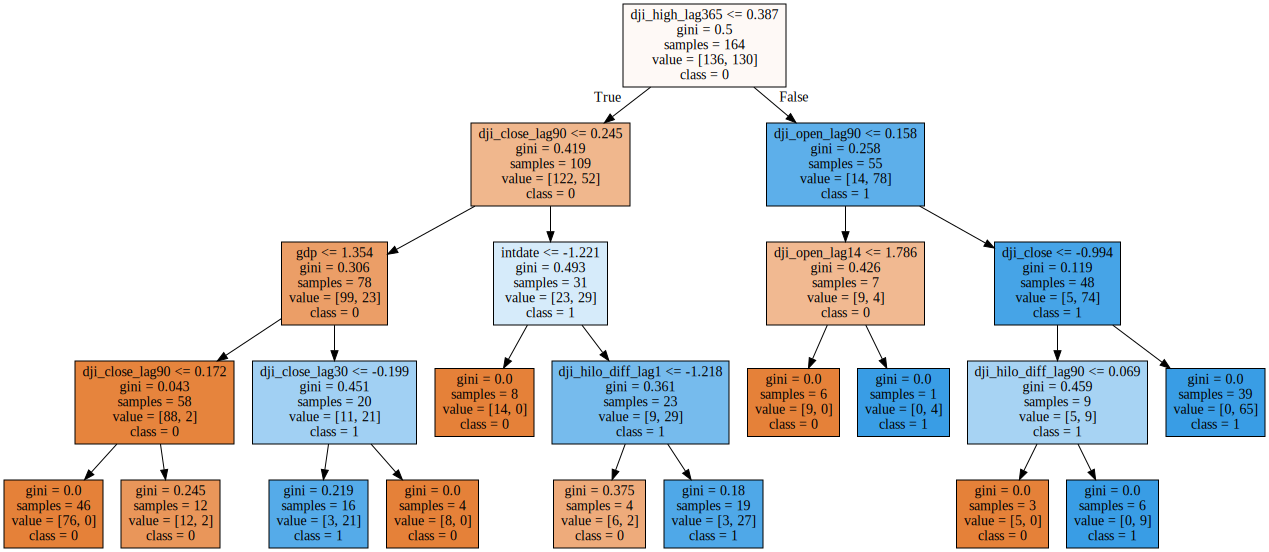

In [90]:
import graphviz
from sklearn import tree
#for tree_in_forest in rf_model.estimators_:
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None, 
                      feature_names=X.columns,  
                      class_names=["0","1"],  
                      filled=True)
graph = graphviz.Source(classification_tree) 
graph

## Check for missing values

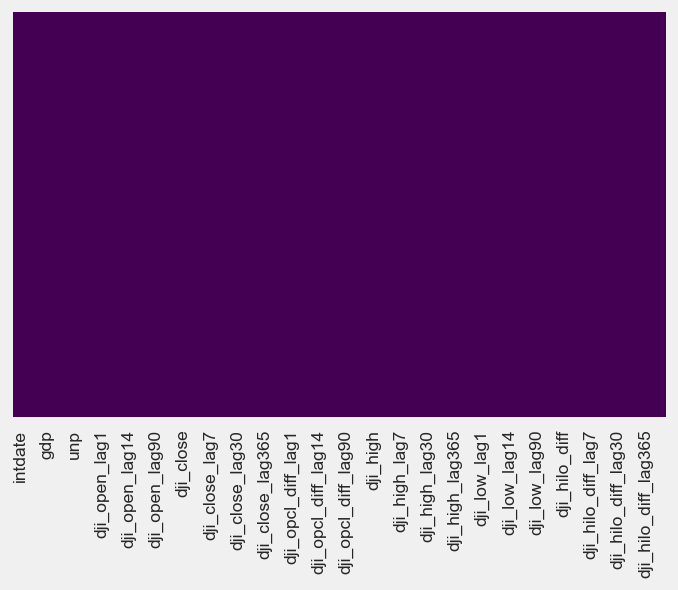

In [91]:
import seaborn as sns
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## Checking Correlation

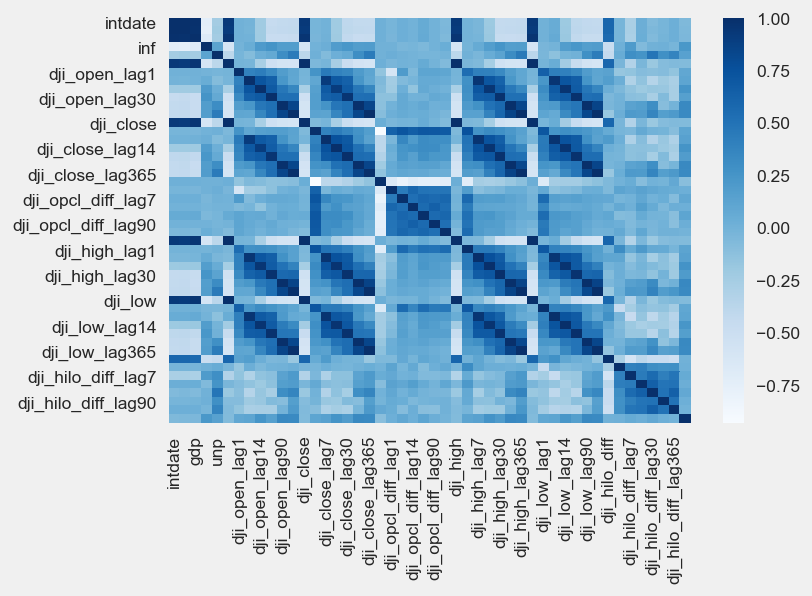

In [92]:
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,10))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)

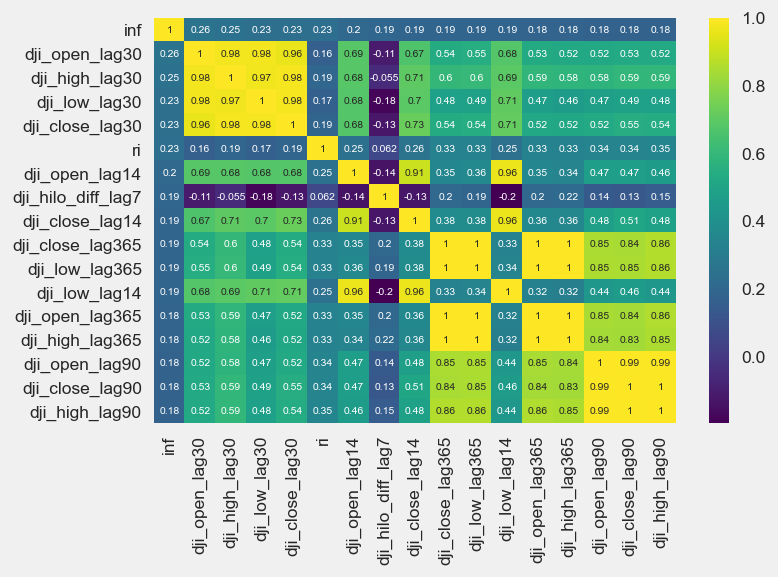

In [93]:
#Quality correlation matrix

matplotlib.rcParams.update({'font.size': 6})

k = 17# number of variables for heatmap
cols = data_df.corr().nlargest(k, 'inf')['inf'].index
cm = data_df[cols].corr()
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,100))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Checking for outliers

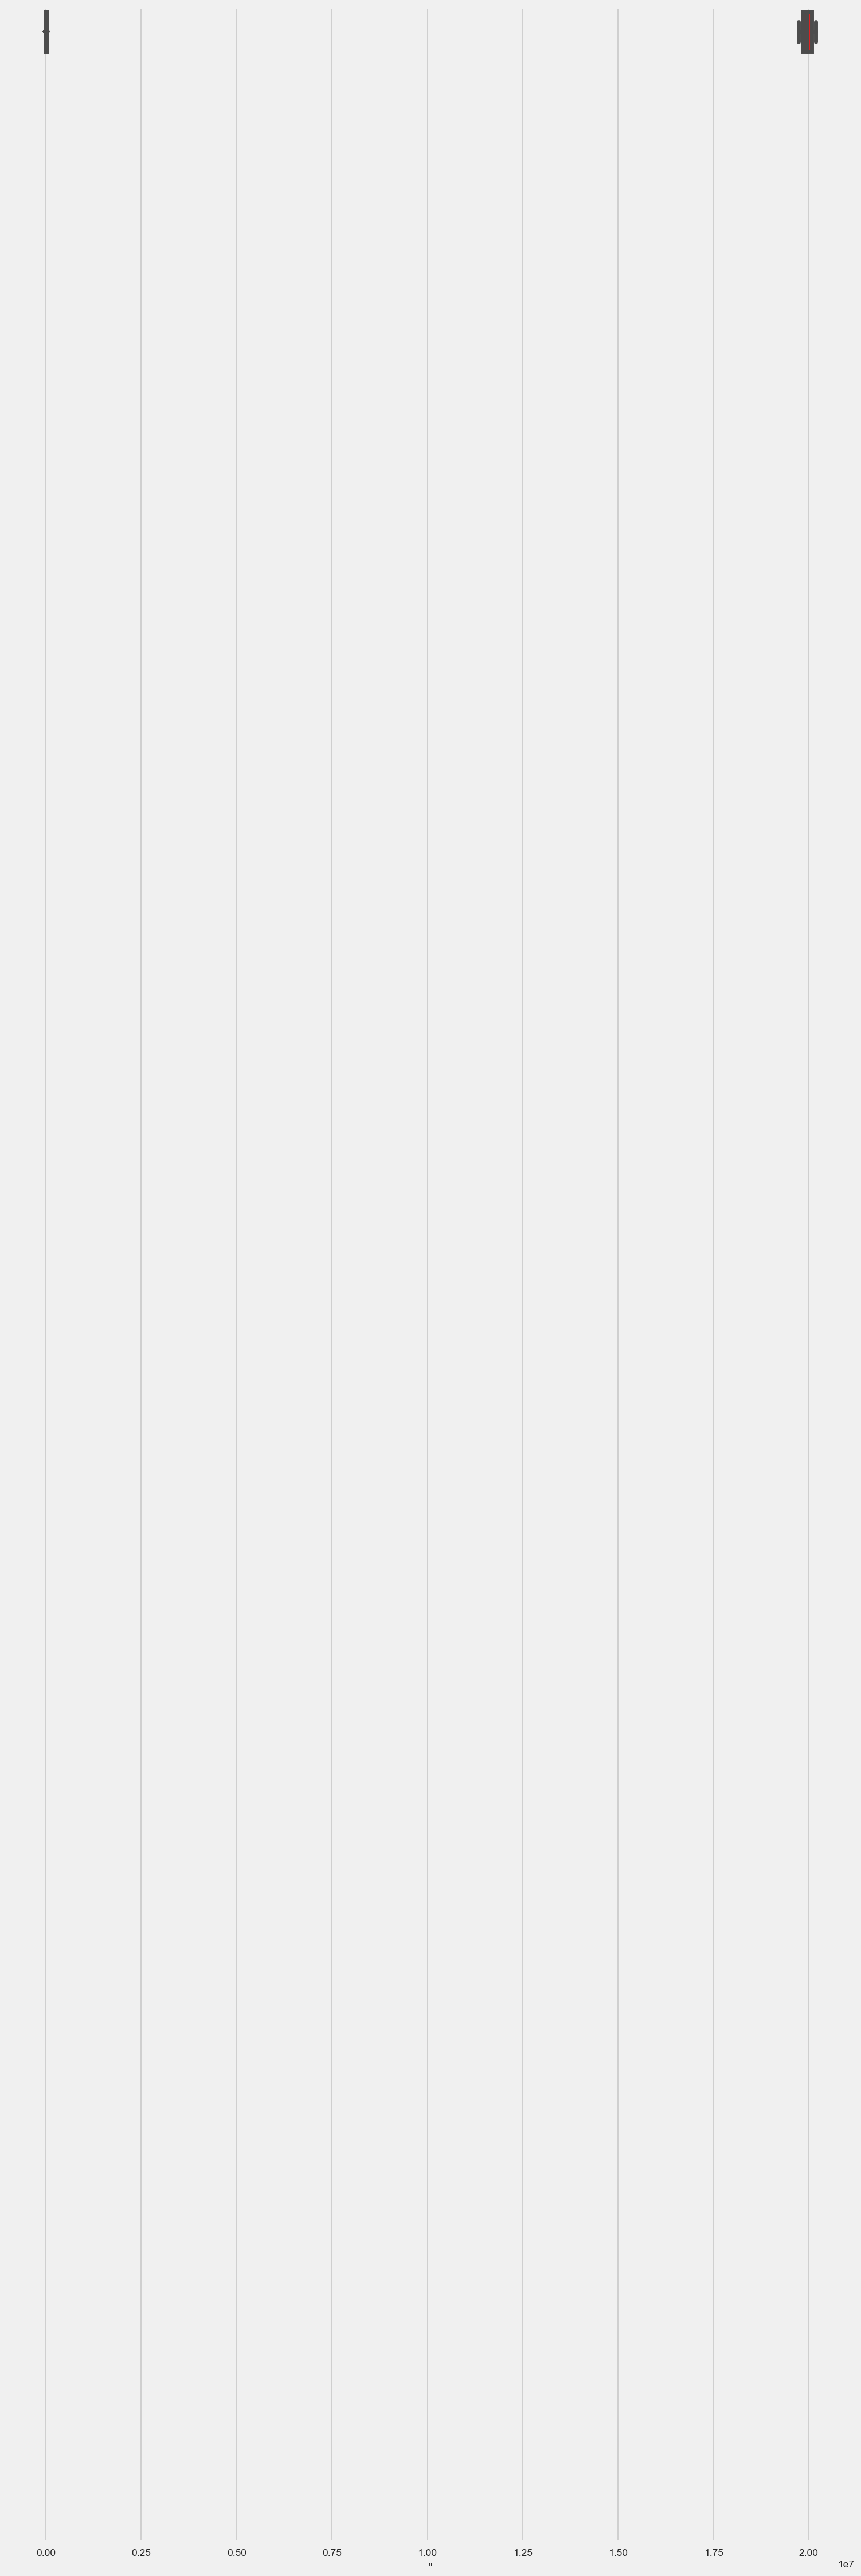

In [94]:
import matplotlib.pyplot as plt

l = data_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,.75
                    *number_of_rows))
for i in range(0,len(l)):
    plt.plot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_df[l[i]],color='red',orient='h')
    plt.tight_layout()

## Checking skewness

/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warning

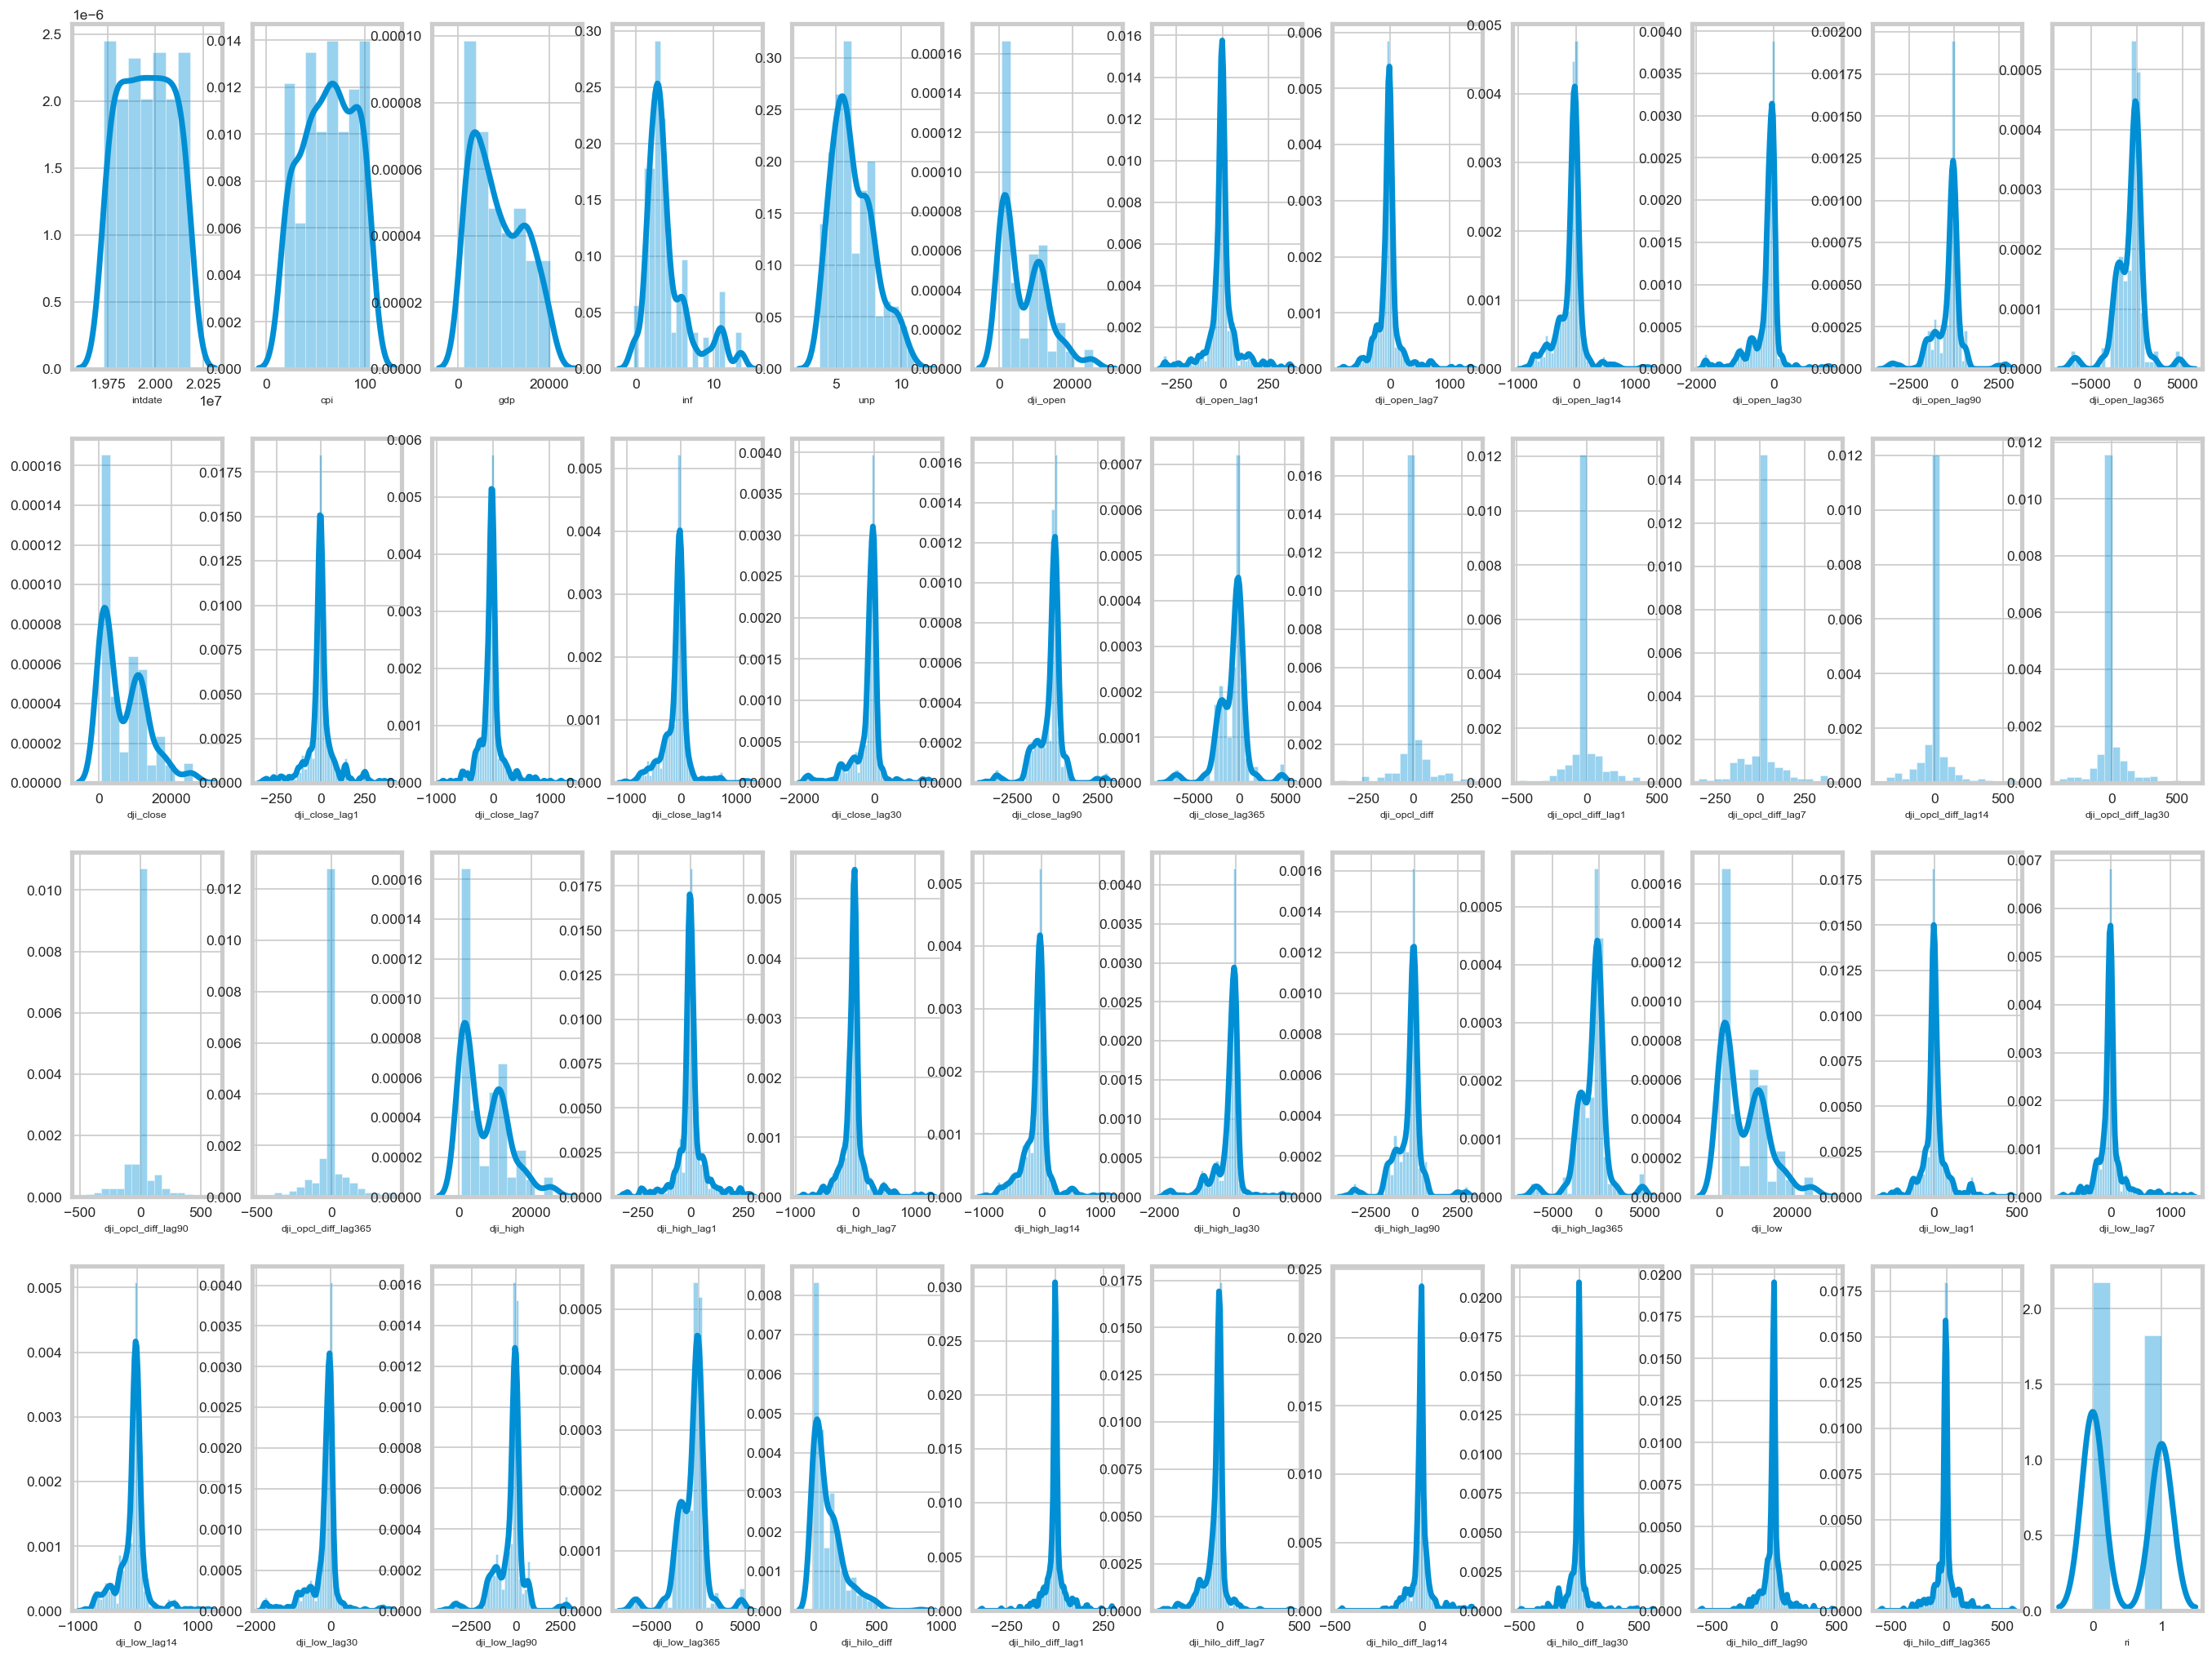

In [95]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data_df[l[i]],kde=True) 